In [2]:
# 기본 패키지 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import scipy as sp 
import matplotlib as mpl

# matplolib, 폰트설정
from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rcParams['font.family']=['NanumBarunGothic.ttf']
plt.rcParams['font.size']=14
# plt.rc('font', family ='NanumSquareRoundR')
sns.set(font = 'Malgun Gothic' ,rc={'axes.unicode_minus':False}, style='darkgrid')

#### 패션MNIST 데이터

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [5]:
(train_input,train_target),(test_input,test_target) = load_data()

In [6]:
train_scaled = train_input / 255.0

In [7]:
train_scaled, val_scaled, train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [8]:
train_input.shape

(60000, 28, 28)

In [9]:
print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


####  모델 생성 함수

In [10]:
def model_fn(a_layer=None):
     model = keras.Sequential(name='model_fn_MakeModel')
     model.add(keras.layers.Flatten(input_shape=(28,28)))
     model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

     if a_layer:
          model.add(a_layer)

     model.add(keras.layers.Dense(10,activation='softmax',name='output'))

     return model

In [11]:
# 함수사용예시
model = model_fn(keras.layers.Dense(100, activation='relu',name='hidden2'))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선 , 정확도 

In [12]:
model = model_fn()
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 2s - loss: 0.5284 - accuracy: 0.8136 - 2s/epoch - 1ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3943 - accuracy: 0.8579 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3552 - accuracy: 0.8716 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3364 - accuracy: 0.8789 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3208 - accuracy: 0.8853 - 2s/epoch - 1ms/step


In [14]:
history.history

{'loss': [0.5284066796302795,
  0.39431220293045044,
  0.35521984100341797,
  0.33642369508743286,
  0.32078731060028076],
 'accuracy': [0.8136249780654907,
  0.8579166531562805,
  0.8715833425521851,
  0.8788958191871643,
  0.8852916955947876]}

#### 손실곡선

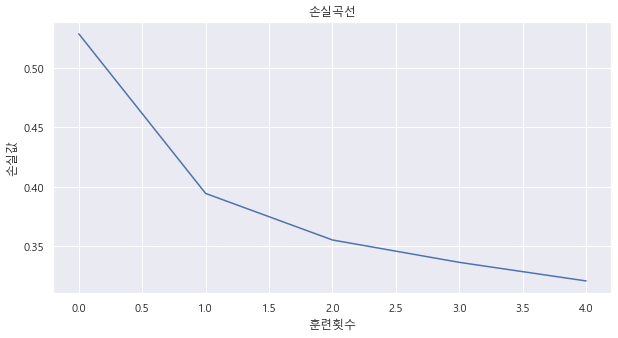

In [15]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.xlabel('훈련횟수')
plt.ylabel('손실값')
plt.title('손실곡선')
plt.show()

#### 정확도

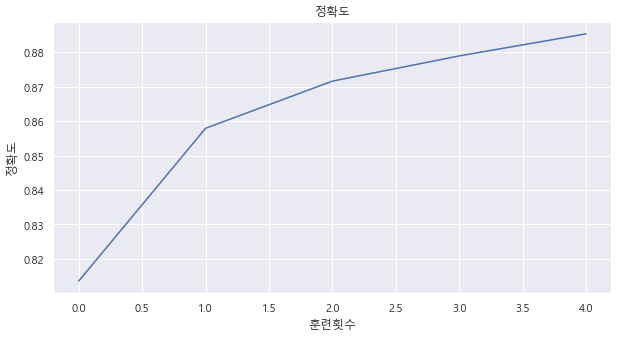

In [16]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.xlabel('훈련횟수')
plt.ylabel('정확도')
plt.title('정확도')
plt.show()

#### epoch =20 훈련

In [17]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20)


Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5332 - accuracy: 0.8131
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3958 - accuracy: 0.8588
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3569 - accuracy: 0.8724
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3340 - accuracy: 0.8799
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3185 - accuracy: 0.8853
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3052 - accuracy: 0.8906
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2950 - accuracy: 0.8941
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2876 - accuracy: 0.8995
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2795 - accuracy: 0.9018
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.275

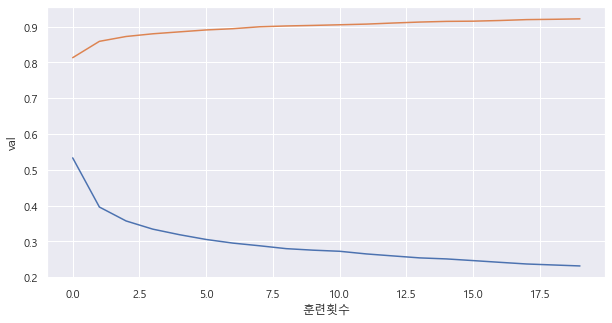

In [18]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('훈련횟수')
plt.ylabel('val')
plt.show()

#### 검증손실
- 훈련세트 훈련 -> 정확도 92% 

In [19]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5234 - accuracy: 0.8161 - val_loss: 0.4018 - val_accuracy: 0.8577
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3870 - accuracy: 0.8611 - val_loss: 0.4146 - val_accuracy: 0.8518
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3542 - accuracy: 0.8731 - val_loss: 0.3919 - val_accuracy: 0.8622
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3338 - accuracy: 0.8811 - val_loss: 0.3803 - val_accuracy: 0.8686
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3181 - accuracy: 0.8874 - val_loss: 0.3638 - val_accuracy: 0.8781
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3071 - accuracy: 0.8916 - val_loss: 0.3752 - val_accuracy: 0.8772
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2997 - accuracy: 0.8940 - val_loss: 0.3753 - val_accuracy:

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트 & 검증세트 비교

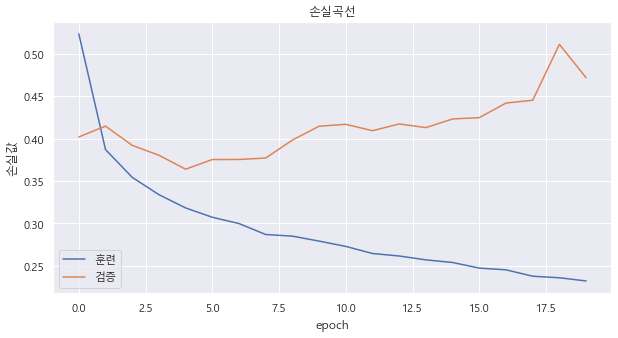

In [21]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.title('손실곡선')
plt.show()

#### 드롭아웃

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5933 - accuracy: 0.7902 - val_loss: 0.4392 - val_accuracy: 0.8430
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4485 - accuracy: 0.8424 - val_loss: 0.4209 - val_accuracy: 0.8547
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4219 - accuracy: 0.8533 - val_loss: 0.3892 - val_accuracy: 0.8633
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4071 - accuracy: 0.8594 - val_loss: 0.3758 - val_accuracy: 0.8702
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3985 - accuracy: 0.8631 - val_loss: 0.4266 - val_accuracy: 0.8613
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3895 - accuracy: 0.8643 - val_loss: 0.4045 - val_accuracy: 0.8692
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3892 - accuracy: 0.8670 - val_loss: 0.3980 - val_accuracy:

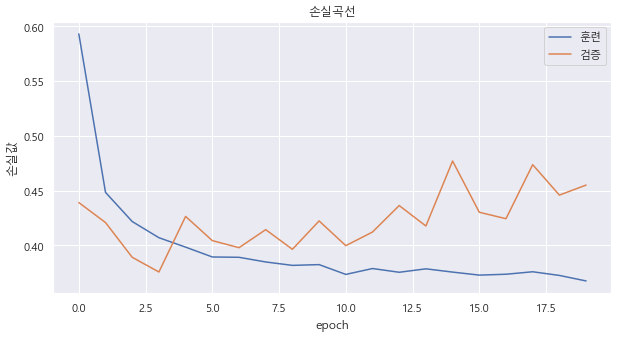

In [24]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.title('손실곡선')
plt.show()

In [25]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3673 - accuracy: 0.8726 - val_loss: 0.3898 - val_accuracy: 0.8752
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3537 - accuracy: 0.8762 - val_loss: 0.3958 - val_accuracy: 0.8720
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3336 - accuracy: 0.8790 - val_loss: 0.3902 - val_accuracy: 0.8773
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3286 - accuracy: 0.8808 - val_loss: 0.3758 - val_accuracy: 0.8772
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3152 - accuracy: 0.8844 - val_loss: 0.3660 - val_accuracy: 0.8782
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3115 - accuracy: 0.8855 - val_loss: 0.3825 - val_accuracy: 0.8787
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3047 - accuracy: 0.8876 - val_loss: 0.3599 - val_accuracy:

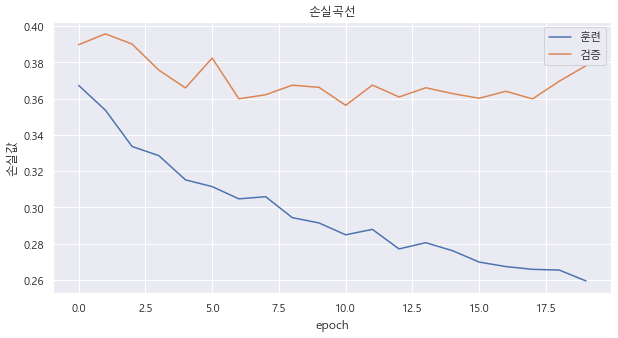

In [26]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.title('손실곡선')
plt.show()

#### 모델 저장, 로드

In [27]:
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.save_weights('./data/model_weight.h5')  # 훈련된가중치만저장

In [29]:
# 훈련된 전체 데이터 저장
# 모델전체를저장하는걸 권장
model.save('./data/model.h5')

#### 가중치모델로드

In [30]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model_weight.h5')

In [31]:
model.evaluate(val_scaled,val_target)  # 가중치만 불렀기때문에 이건 안돼

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

#### 전체모델로드

In [32]:
model=keras.models.load_model('./data/model.h5')  
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3782 - accuracy: 0.8856


[0.3782278597354889, 0.8855833411216736]

- 가중치만 저장하면 모델 기능에 제약이 생기므로 훈련된 모델의 전체 데이터를 저장하자 ~ (모든 기능 수행 가능)

In [33]:
model.predict(val_scaled)

375/375 [==============================] - 0s 1ms/step


array([[3.9077582e-24, 0.0000000e+00, 5.7875298e-25, ..., 3.8966009e-13,
        1.0000000e+00, 7.8902776e-16],
       [3.9290365e-20, 0.0000000e+00, 6.2485306e-18, ..., 1.3292621e-19,
        1.0000000e+00, 3.4892142e-21],
       [3.3341603e-27, 1.6748060e-29, 0.0000000e+00, ..., 9.9999940e-01,
        1.8226665e-20, 2.6197136e-16],
       ...,
       [7.7069530e-13, 0.0000000e+00, 7.6793044e-14, ..., 1.0962456e-17,
        1.0000000e+00, 6.6980676e-19],
       [1.4698780e-19, 8.1930833e-38, 1.3693468e-17, ..., 3.7902995e-19,
        1.0000000e+00, 2.6725295e-21],
       [1.7857277e-01, 9.4260611e-16, 7.1910819e-07, ..., 2.0656487e-05,
        3.2550284e-07, 2.8147383e-02]], dtype=float32)

In [34]:
### 예측결과

val_labels = np.argmax(model.predict(val_scaled),axis=-1)
np.mean(val_labels==val_target)


375/375 [==============================] - 0s 975us/step


0.8855833333333333

In [35]:
val_labels.shape

(12000,)

In [36]:
val_labels

array([8, 8, 7, ..., 8, 8, 3], dtype=int64)

#### callback

In [37]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled,train_target,epochs=20, verbose=1, validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5988 - accuracy: 0.7889 - val_loss: 0.4311 - val_accuracy: 0.8429
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4421 - accuracy: 0.8415 - val_loss: 0.3881 - val_accuracy: 0.8586
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4078 - accuracy: 0.8519 - val_loss: 0.3695 - val_accuracy: 0.8677
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3846 - accuracy: 0.8613 - val_loss: 0.3587 - val_accuracy: 0.8688
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3687 - accuracy: 0.8649 - val_loss: 0.3395 - val_accuracy: 0.8766
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3536 - accuracy: 0.8703 - val_loss: 0.3616 - val_accuracy: 0.8668
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3458 - accuracy: 0.8737 - val_loss: 0.3295 - val_accuracy:

In [38]:
# 체크포인트 확인

model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.8824


[0.33699876070022583, 0.8824166655540466]

#### 조기종료

In [39]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')
# 베스트 모델을 저장할 콜백
# save_best_only=True 해줘야 가장 좋은 모델이 저장된다. 과정 보고싶으면 verbose=1 !
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5',save_best_only=True,verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20, verbose=1, validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# history=model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.6005 - accuracy: 0.7891
Epoch 1: val_loss improved from inf to 0.45114, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6003 - accuracy: 0.7892 - val_loss: 0.4511 - val_accuracy: 0.8379
Epoch 2/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.8391
Epoch 2: val_loss improved from 0.45114 to 0.38616, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4428 - accuracy: 0.8392 - val_loss: 0.3862 - val_accuracy: 0.8574
Epoch 3/20
1487/1500 [============================>.] - ETA: 0s - loss: 0.4085 - accuracy: 0.8511
Epoch 3: val_loss improved from 0.38616 to 0.36546, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4086 - accuracy: 0.8511 - val_loss: 0.3655 - val_accuracy: 0.8645
Epoch 4/20
1488/1500 [===================

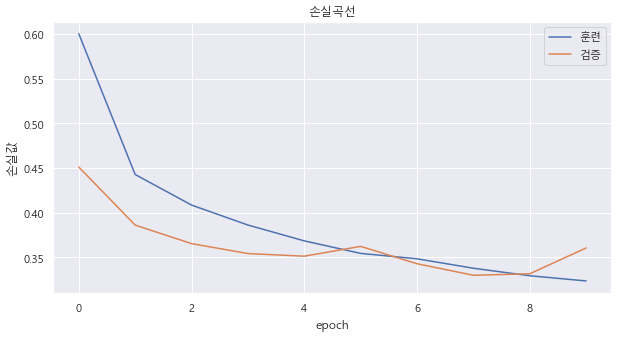

In [40]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.title('손실곡선')
plt.show()

In [41]:
# 언제 종료했는지 확인
early_stopping_cb.stopped_epoch #9에서 멈췄어 (dropout)

9

In [42]:
model.evaluate(val_scaled, val_target) #8번째 에포크값으로 evaluate

375/375 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8809


[0.3300167918205261, 0.8809166550636292]

In [43]:
model.save('./data/best_model_epoch9.h5')

#### 조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장 값 비교

In [44]:
model_cp=keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8809


[0.3300167918205261, 0.8809166550636292]

In [45]:
### 예측결과

val_labels = np.argmax(model.predict(val_scaled),axis=-1)
np.mean(val_labels==val_target)

375/375 [==============================] - 0s 1ms/step


0.8809166666666667

In [46]:
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64)